In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_validate,train_test_split,ShuffleSplit,GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_validate,ShuffleSplit
from sklearn.svm import SVC

In [49]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [50]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.000,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.500,E40,C
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.050,NaN,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.100,NaN,S


In [52]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,1010,1,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C
267,1159,3,"Warren, Mr. Charles William",male,NaN,0,0,C.A. 49867,7.5500,NaN,S
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
294,1186,3,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S
162,1054,2,"Wright, Miss. Marion",female,26.0,0,0,220844,13.5000,NaN,S


In [60]:
def details(df):
    print(f'Data Shape: {df.shape}')
    ans=pd.DataFrame(df.dtypes, columns=['data type'])
    ans['n_miss']=df.isnull().sum().values
    ans['p_miss']=df.isnull().sum().values/len(df)*100
    ans['n_unique']=df.nunique().values
    desc=pd.DataFrame(df.describe(include='all').transpose())
    ans['min']=desc['min'].values
    ans['max']=desc['max'].values
    ans['mean']=desc['mean'].values
    ans['standard_daviation']=desc['std'].values
    ans['first value'] = df.loc[0].values
    ans['second value'] = df.loc[1].values
    ans['third value'] = df.loc[2].values
    return ans

In [61]:
details(train).style.background_gradient(cmap='Set3_r')

Data Shape: (891, 12)


,data type,n_miss,p_miss,n_unique,min,max,mean,standard_daviation,first value,second value,third value
PassengerId,int64,0,0.000000,891,1.000000,891.000000,446.000000,257.353842,1,2,3
Survived,int64,0,0.000000,2,0.000000,1.000000,0.383838,0.486592,0,1,1
Pclass,int64,0,0.000000,3,1.000000,3.000000,2.308642,0.836071,3,1,3
Name,object,0,0.000000,891,nan,nan,nan,nan,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Heikkinen, Miss. Laina"
Sex,object,0,0.000000,2,nan,nan,nan,nan,male,female,female
Age,float64,177,19.865320,88,0.420000,80.000000,29.699118,14.526497,22.000000,38.000000,26.000000
SibSp,int64,0,0.000000,7,0.000000,8.000000,0.523008,1.102743,1,1,0
Parch,int64,0,0.000000,7,0.000000,6.000000,0.381594,0.806057,0,0,0
Ticket,object,0,0.000000,681,nan,nan,nan,nan,A/5 21171,PC 17599,STON/O2. 3101282
Fare,float64,0,0.000000,248,0.000000,512.329200,32.204208,49.693429,7.250000,71.283300,7.925000


In [63]:
details(train)

Data Shape: (891, 12)


,data type,n_miss,p_miss,n_unique,min,max,mean,standard_daviation,first value,second value,third value
PassengerId,int64,0,0.000000,891,1.0,891.0,446.0,257.353842,1,2,3
Survived,int64,0,0.000000,2,0.0,1.0,0.383838,0.486592,0,1,1
Pclass,int64,0,0.000000,3,1.0,3.0,2.308642,0.836071,3,1,3
Name,object,0,0.000000,891,NaN,NaN,NaN,NaN,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,object,0,0.000000,2,NaN,NaN,NaN,NaN,male,female,female
Age,float64,177,19.865320,88,0.42,80.0,29.699118,14.526497,22.0,38.0,26.0
SibSp,int64,0,0.000000,7,0.0,8.0,0.523008,1.102743,1,1,0
Parch,int64,0,0.000000,7,0.0,6.0,0.381594,0.806057,0,0,0
Ticket,object,0,0.000000,681,NaN,NaN,NaN,NaN,A/5 21171,PC 17599,STON/O2. 3101282
Fare,float64,0,0.000000,248,0.0,512.3292,32.204208,49.693429,7.25,71.2833,7.925


In [64]:
details(test)

Data Shape: (418, 11)


,data type,n_miss,p_miss,n_unique,min,max,mean,standard_daviation,first value,second value,third value
PassengerId,int64,0,0.000000,418,892.0,1309.0,1100.5,120.810458,892,893,894
Pclass,int64,0,0.000000,3,1.0,3.0,2.26555,0.841838,3,3,2
Name,object,0,0.000000,418,NaN,NaN,NaN,NaN,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis"
Sex,object,0,0.000000,2,NaN,NaN,NaN,NaN,male,female,male
Age,float64,86,20.574163,79,0.17,76.0,30.27259,14.181209,34.5,47.0,62.0
SibSp,int64,0,0.000000,7,0.0,8.0,0.447368,0.89676,0,1,0
Parch,int64,0,0.000000,8,0.0,9.0,0.392344,0.981429,0,0,0
Ticket,object,0,0.000000,363,NaN,NaN,NaN,NaN,330911,363272,240276
Fare,float64,1,0.239234,169,0.0,512.3292,35.627188,55.907576,7.8292,7.0,9.6875
Cabin,object,327,78.229665,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

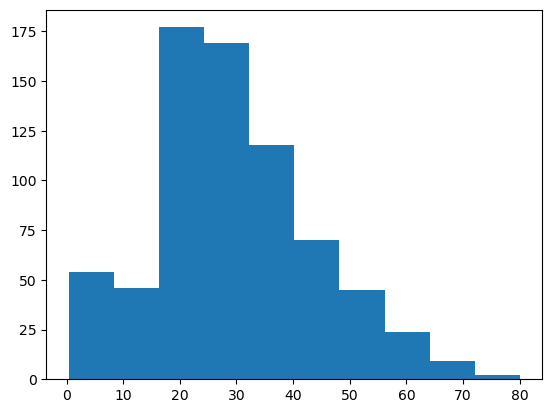

In [73]:
plt.hist(train['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

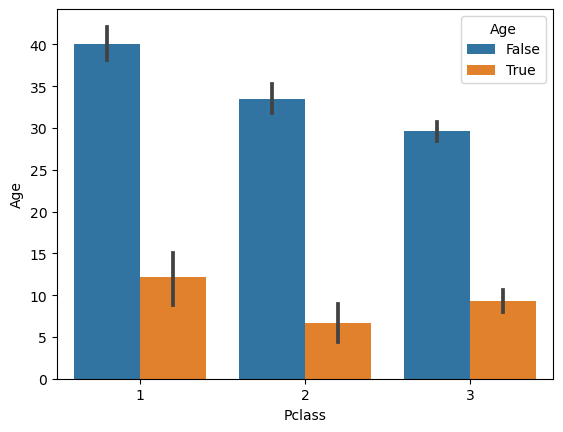

In [76]:
sns.barplot(x=train['Pclass'], y=train['Age'], hue=train['Age']<18)

<Axes: xlabel='Embarked', ylabel='Survived'>

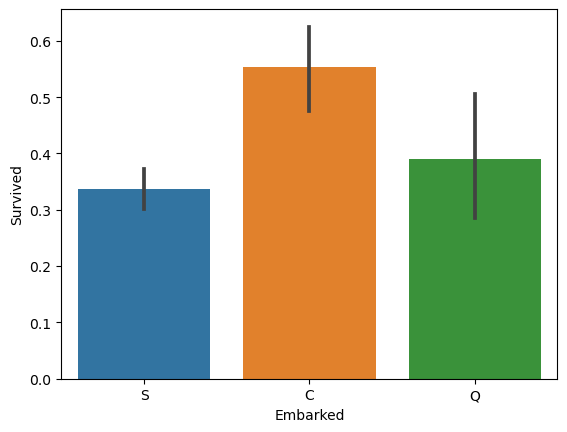

In [78]:
sns.barplot(x=train['Embarked'], y=train['Survived'])

<Axes: xlabel='Survived', ylabel='Age'>

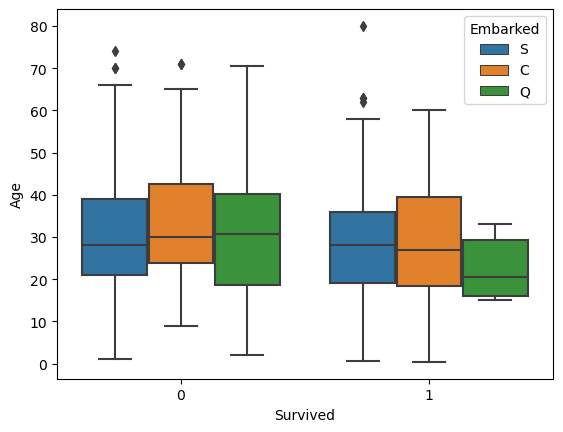

In [80]:
sns.boxplot(x=train['Survived'],y= train['Age'], hue=train['Embarked'])

In [88]:
def plot(f):
    Survived = train[train['Survived']==1][f].value_counts()
    Deceased = train[train["Survived"]==0][f].value_counts()
    df=pd.DataFrame([Survived,Deceased])
    df.index = ["Survived","Deceased"]
    df.plot(kind = 'bar',stacked=True,figsize = (5,5))
# This function takes a column of data and plots the death rate in that column

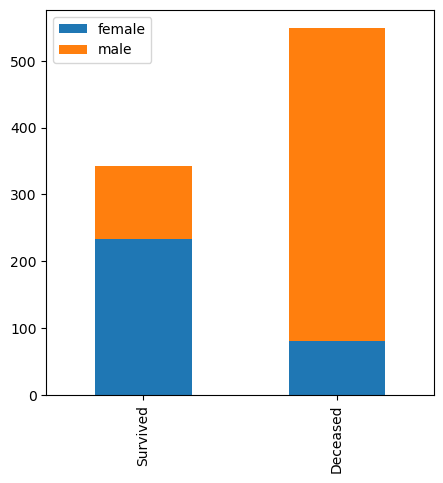

In [89]:
plot('Sex')

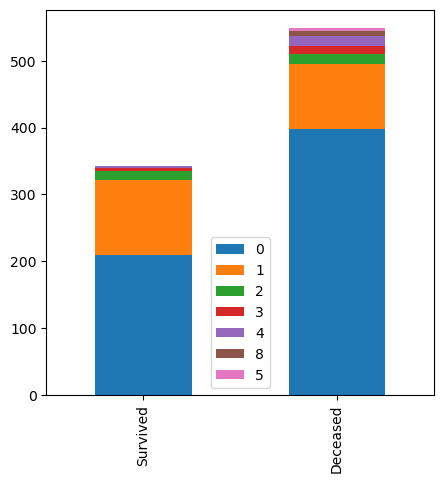

In [90]:
plot('SibSp')

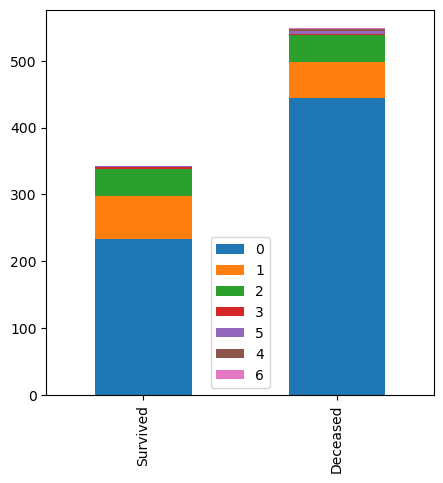

In [91]:
chart('Parch')

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


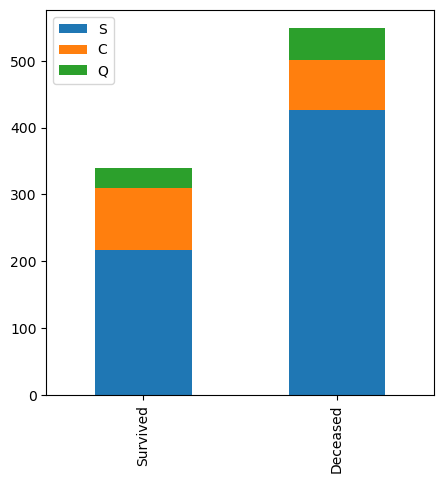

In [94]:
plot('Embarked')
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

In [95]:
train.drop(['Name', 'Survived'], axis=1, inplace=True)

In [97]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [109]:
numerical_train=train.select_dtypes(['int64', 'float64'])
categorical_train=train.select_dtypes('object')

In [110]:
categorical_train

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S
...,...,...,...,...
886,male,211536,NaN,S
887,female,112053,B42,S
888,female,W./C. 6607,NaN,S
889,male,111369,C148,C


In [111]:
numerical_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [112]:
train['Parch'].nunique()

7

In [113]:
categorical_train.drop(columns=['Ticket', 'Cabin'], inplace=True)
categorical_train.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [115]:
categorical_train.nunique() # since not so many unique categories are there, we can apply labelencoder 

Sex         2
Embarked    3
dtype: int64

In [122]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le=LabelEncoder()

In [117]:
categorical_train['Sex']=le.fit_transform(categorical_train['Sex'])

In [120]:
categorical_train.sample(5)

,Sex,Embarked
217,1,S
210,1,S
79,0,S
849,0,C
660,1,S


In [121]:
le.classes_

array(['female', 'male'], dtype=object)

In [165]:
categorical_train.isna().sum()

Sex         0
Embarked    0
dtype: int64

In [166]:
categorical_train['Embarked'][categorical_train['Embarked'].isna()]

Series([], Name: Embarked, dtype: object)

In [167]:
def random():
    return np.random.choice(['S', 'C', 'Q'])

In [168]:
categorical_train['Embarked'][categorical_train['Embarked'].isna()] = np.asarray([random(),random()])


In [147]:
categorical_train['Embarked'][68], categorical_train['Embarked'][829]

('S', 'C')

In [150]:
categorical_train.isna().sum()

Sex         0
Embarked    0
dtype: int64

In [164]:
categorical_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [151]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [161]:
df= pd.DataFrame(ohe.fit_transform(np.asarray(categorical_train['Embarked']).reshape(-1,1)).toarray(),
                    columns=['Embarked0','Embarked1','Embarked2'])
df

,Embarked0,Embarked1,Embarked2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [169]:
new_df=pd.concat([categorical_train.drop(columns=['Embarked']), df, numerical_train], axis=1)

In [170]:
new_df

,Sex,Embarked0,Embarked1,Embarked2,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,0.0,1.0,1,3,22.0,1,0,7.2500
1,0,1.0,0.0,0.0,2,1,38.0,1,0,71.2833
2,0,0.0,0.0,1.0,3,3,26.0,0,0,7.9250
3,0,0.0,0.0,1.0,4,1,35.0,1,0,53.1000
4,1,0.0,0.0,1.0,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,1,0.0,0.0,1.0,887,2,27.0,0,0,13.0000
887,0,0.0,0.0,1.0,888,1,19.0,0,0,30.0000
888,0,0.0,0.0,1.0,889,3,NaN,1,2,23.4500
889,1,1.0,0.0,0.0,890,1,26.0,0,0,30.0000


In [171]:
new_df.isna().sum()

Sex              0
Embarked0        0
Embarked1        0
Embarked2        0
PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64